# Projet POKER

## I. INTRODUCTION

### 1. Contexte du projet

Nous avons entrepris au cours de cette session de projet, de nous pencher sur les IA élémentaires utilisées dans les jeux de casino. Au poker, le joueur est tenu de disposer d'une main composée de cinq cartes parmi un jeu règlementaire de 52 cartes. Notre objectif est de concevoir un programme qui sera chargé de détecter le résultat d'une main tirée aléatoirement. On entend par résultat d'une main le terme rapporté au motif qui apparaît au sein des cartes de cette dernière. Par exemple, un main comportant exactement quatre cartes portant un numéro identique se verra attribuée le résultat "carré", conformément aux termes du poker.

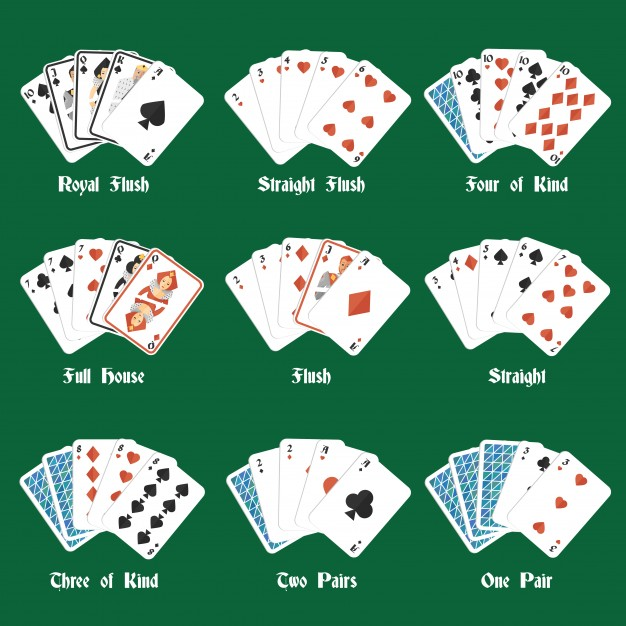

### 2. Présentation du jeu de données

#### Source
Nous avons utilisé le jeu "Poker Hand Dataset" téléchargé sur le site de l'[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).

Creators : Robert Cattral (cattral@gmail.com)    
Franz Oppacher (oppacher@scs.carleton.ca)
Carleton University, Department of Computer Science
Intelligent Systems Research Unit
1125 Colonel By Drive, Ottawa, Ontario, Canada, K1S5B6
    
Date of release: Jan 2007

#### Information pertinente
Chaque enregistrement est un exemple de main composée de cinq cartes à jouer tirées d'un jeu standard de 52 cartes. Chaque carte est décrite à l'aide de deux attributs (couleur et rang), soit un total de 10 attributs prédictifs.Il existe un attribut de classe qui décrit la "main de poker". L'ordre des cartes est important.C'est pourquoi il y a 480 mains de quinte royale possibles au lieu de 4 (une pour chaque couleur).

#### Nombre d'instances
25010 testing set, 1,000,000 training set

#### Nombre d'attributs
10 attributs prédictifs, 1 attribut de classe attribué

#### Information des attributs
1) S1 “Suit of card #1”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   2) C1 “Rank of card #1”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   3) S2 “Suit of card #2”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   4) C2 “Rank of card #2”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   5) S3 “Suit of card #3”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   6) C3 “Rank of card #3”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   7) S4 “Suit of card #4”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   8) C4 “Rank of card #4”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   9) S5 “Suit of card #5”
      Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

   10) C5 “Rank of card 5”
      Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)

   11) CLASS “Poker Hand”
      Ordinal (0-9)

      0: Nothing in hand; not a recognized poker hand 
      1: One pair; one pair of equal ranks within five cards
      2: Two pairs; two pairs of equal ranks within five cards
      3: Three of a kind; three equal ranks within five cards
      4: Straight; five cards, sequentially ranked with no gaps
      5: Flush; five cards with the same suit
      6: Full house; pair + different rank three of a kind
      7: Four of a kind; four equal ranks within five cards
      8: Straight flush; straight + flush
      9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush


### 3. Méthodologie pour résoudre ce problème de Machine Learning

Il nous faut mettre au point un algorithme qui soit capable de déceler des motifs que sont les résultats d'une main, c'est précisément en cela qu'il s'agit d'un problème de Machine Learning. Premièrement, nous disposons d'une base de données fournie (nous n'avons pas à sélectionner des données, réfléchir aux moyens de les mesurer, les collecter, puis les ordonner),qu'il nous faudra préparer et nettoyer afin d'éviter que l'entraînement du modèle soit biaisé. Dans un second temps, l'analyse des données permettra d'identifier un modèle adéquat, que nous allons par la suite entraîner sur un training set. Pour conclure, nous exposerons notre algorithme sur un testing set afin d'en évaluer les performances et de l'améliorer en conséquence.

#### Type de problème

Toutes les instances des ensembles de données sont étiquetées, ce qui fait de notre algorithme un modèle **d'apprentissage automatique supervisé**.

En outre, nous voulons que notre algorithme prédise un résultat discret, c'est-à-dire une étiquette de classe, aux exemples d'entrée. Cela en fait un **modèle de classification**.

Enfin, la tâche implique la prédiction d'un classe parmi un esemble supérieur à deux classes, soit dix ici, ce qui en fait un modèle de **classification multi-classes**.


## II. ANALYSE DES DONNEES

### 1. Des features particulières

Notre problème est purement probabiliste, il s'agit même d'une situation d'équiprobabilité alors qu'on tire les cartes. En conséquence, aucune des dix features ne sauraient influer le résultat davantage qu'une autre. De ce fait, lorsqu'on analysera les données, on aura beau isoler une feature afin d'étudier le comportement du résultat et des autres features dans n'importe quelle configuration, nous ne pourrions pas observer une correspondance significative entre la variation d'une feature et le résultat final. C'est ce qui constitue la difficulté de ce problème.

### 2. Exploration et Nettoyage des données

Comme expliqué précédemment il est inutile d'isoler une feature et d'étudier le résultat et les autres features en fonction de la variation de cette première compte tenu du problème considéré.
De plus, nous connaissons déjà l'impact des combinaisons des features sur le résultat et dans quelles mesures, étant donné qu'elles suivent les règles du poker classique.
​
Toutefois, il apparait pertinent d'étudier les variations du résultat final et plus spécifiquement les occurrences de ses issues potentielles. 

In [ ]:
# IMPORT

import pandas as pd
import numpy as np
from array import *

In [ ]:
""" 
Loading the data
poker-hand-training-true.data and poker-hand-testing.data files can be downloaded at https://archive.ics.uci.edu/ml/index.php
if you haven't downloaded the data, you can use : 
"""
df_test = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data", names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5', 'CLASS'])
df_train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data", names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5', 'CLASS'])

# If you have loaded the data, uncode the lines below
#df_train = pandas.read_csv("poker-hand-training-true.data", names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5', 'CLASS'])
#df_test = pandas.read_csv("poker-hand-testing.data", names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5', 'CLASS'])

In [ ]:
# on calcule la proportion de chaque main dans le training set
resultat_training = [[],[],[],[],[],[],[],[],[],[]]

for i in range (len(df_train)):
    resultat_training[df_train.values[i,10]].append(df_train.values[i,:10])
 
print("Proportion dans le training set")   
for i in range (10):
    print(len(resultat_training[i])/len(df_train))

Proportion dans le training set
0.501209
0.422498
0.047622
0.021121
0.003885
0.001996
0.001424
0.00023
1.2e-05
3e-06


On obtient la figure suivante.

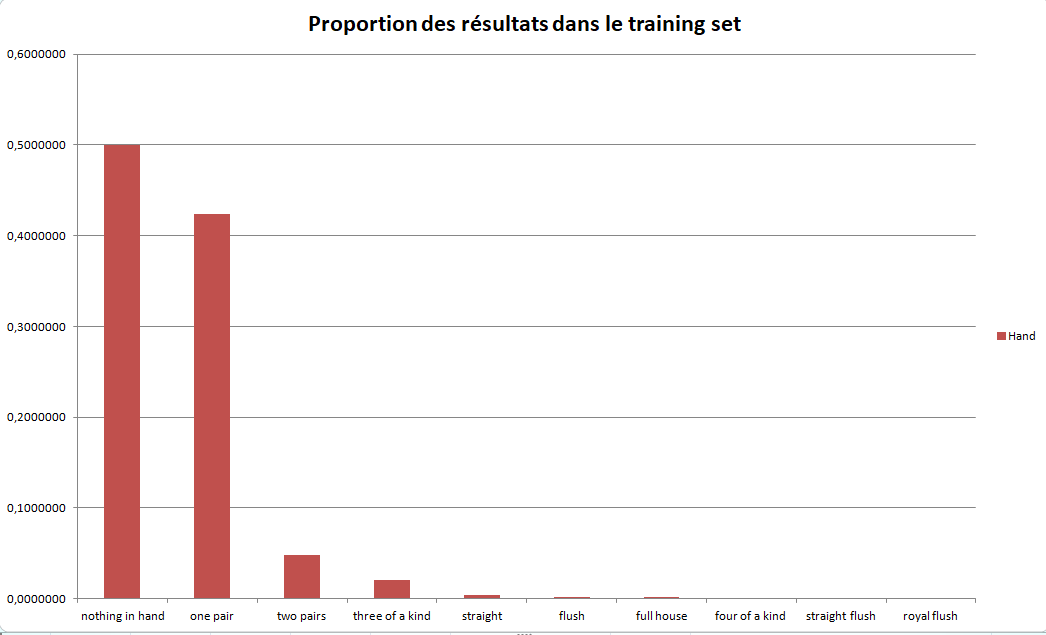
​
On remarque que la proportion des mains vides, à savoir quand le joueur n'a aucun schéma valorisable, ainsi que celle des pairs, à savoir quand le joueur dispose de deux cartes portant un numéro identique, constituent à elles deux 90% du training set. C'est un élément à tenir compte lors du calcul de la généralisation de notre modèle algorithmique. Il nous faudra regarder la généralisation selon les diverses issues possibles car une généralisation égale à 90% ne pourrait en réalité se contenter de donner les mains comportant une paire et les mains vides, ce qui est très nettement en deçà des performances attendues.
​
De la même manière, nous allons regarder la répartition des issues du résultat sur le testing set, afin de s'assurer qu'il n'y ait pas d'aberrations. 

In [ ]:
# on calcule la proportion de chaque main dans le testing set
resultat_testing = [[],[],[],[],[],[],[],[],[],[]]

for i in range (len(df_test)):
    resultat_testing[df_test.values[i,10]].append(df_test.values[i,:10])

print("Proportion dans le testing set")
for i in range (10):
    print(len(resultat_testing[i])/len(df_test))

Proportion dans le testing set
0.4995201919232307
0.42379048380647744
0.04822071171531388
0.020511795281887246
0.003718512594962015
0.0021591363454618153
0.0014394242303078768
0.00023990403838464614
0.00019992003198720512
0.00019992003198720512


Nous obtenons le graphique suivant.

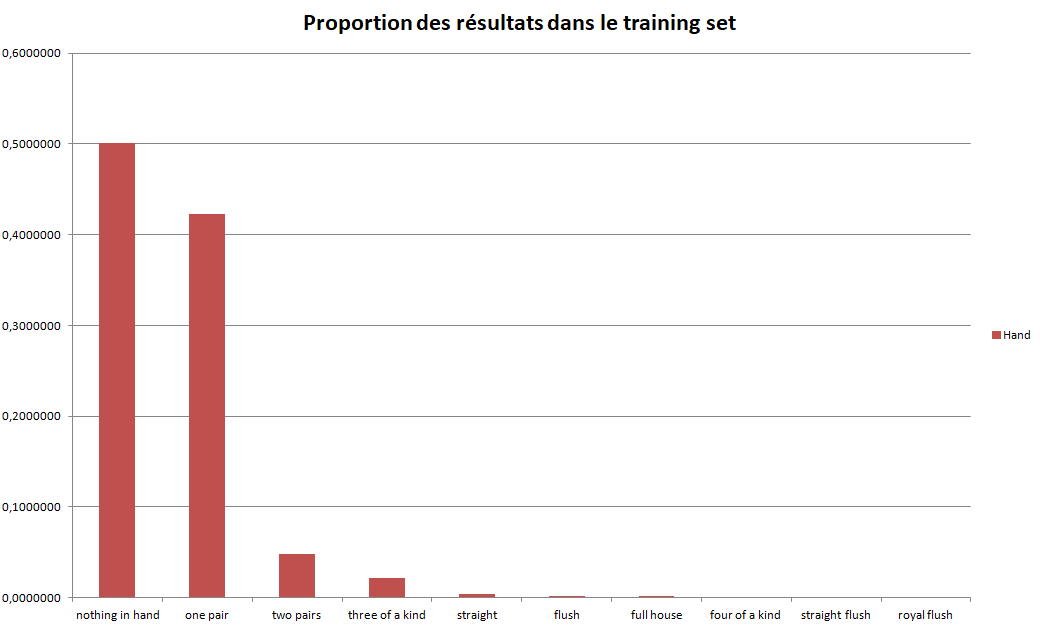
​
On remarque que la quinte flush royale est légèrement trop sureprésentée au vue de la probabilité théorique d'apparition mais ceci ne posera pas de problème pour la suite du projet, nous conserverons donc le training set tel quel. Le testing set pour sa part ne présente pas d'aberrations.

### 3. Encodage à chaud

Parmi nos features, certaines prennent la valeur relative à la couleur de la carte correspondante. Elles sont représentées sous forme d'integers, {1} pour "coeur", {2} pour "pique", {3} pour "carreau" et {4} pour "trèfle". Or, un algorithme de machine learning classique va chercher à créer des liens entre ces valeurs algébriques qui, évidemment, n'ont pas réellement lieu d'exister. Ces relations ordinales, en codage entier, vont être source de mauvaises performances ou de résultats inattendus. Afin de pallier ce léger désagrément, nous allons transformer nos données et ainsi opter pour un One-Hot-Encoding. Il s'agit d'un processus de traitement des données appliqué aux données catégorielles, pour les convertir en une représentation vectorielle binaire, autrement dit, il crée simplement une colonne pour chaque valeur possible et place un 1 dans la colonne appropriée.
Une fois cette modification apportée avec la fonction "get_dummies" de la bibliothèque pandas, nos données sont fin prêtes pour entraîner nos modèles.

In [ ]:
# separating x values from y
df_x_train = df_train[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
df_y_train = df_train[['CLASS']]

df_x_test = df_test[['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5']]
df_y_test = df_test[['CLASS']]

# one hot encoding
df_x_train_ohe = pd.get_dummies(df_x_train, columns=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'])
df_y_train_ohe = pd.get_dummies(df_y_train, columns=['CLASS'])

df_x_test_ohe = pd.get_dummies(df_x_test, columns=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5'])
df_y_test_ohe = pd.get_dummies(df_y_test, columns=['CLASS'])

## III. Modélisation

### 1. Des représentations basiques inadaptées

L'absence de causalité entre une feature isolée et le résultat implique que les modèles basiques tels que la régression logistique ne sont pas adaptés à ce problème. En effet, prenons le temps de l'expliciter afin d'en voir le biais en résultant.



```
# régression logistique
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)

train_score = clf.score(x_test,y_test)
print("Training set score: {:.2f} ".format(train_score))
test_score = clf.score(x_test, y_test)
print("Test set score: {:.2f} ".format(test_score))
```



A présent, regardons de plus près la généralisation fournie par cet algorithme.

```
# on calcule la précision de l'algorithme suivant les différents résultats possibles pour mettre en lumière les résultats qu'il a des difficultés à identifier.
precision = np.zeros((1,10))

for i in range (len(y_pred)):
    if y_pred[i] == y_test[i]:
        precision[0,y_pred[i]] += 1
        
for i in range (10):
    print(precision[0,i]/len(resultat_testing[i]))      # dans notre cas le testing set présente bien tous les types de résultats possibles
```

On obtient une précision médiocre. En effet, on remarque que l'algorithme traite majoritairement les cas où la main du joueur est vide, le cas le plus fréquent. En revanche, les autres cas ne sont peu voir pas considérés. Nous reprendrons plus en détail les performances de cette méthode lors de l'analyse des résultats. A présent, nous allons tester un autre modèle généralement utilisé lors des problème de classification : la méthode des K Neighbors.



```
# K-Neighbors
from sklearn.multiclass import KNeighborsClassifier

# préparation des listes
x_train = df_x_train_ohe.to_numpy()
y_train = df_y_train_ohe.to_numpy()

x_test = df_x_test_ohe.to_numpy()
y_test = df_y_test_ohe.to_numpy()

clf = KNeighborsClassifier()
clf.fit(x_train,y_train)
print("traning complete")

train_score = clf.score(x_test,y_test)
print("Training set score: {:.2f} ".format(train_score))
test_score = clf.score(x_test, y_test)
print("Test set score: {:.2f} ".format(test_score))


Regardons donc la généralisation fournie par cette méthode.

```
# on calcule la précision de l'algorithme suivant les différents résultats possibles pour mettre en lumière les résultats qu'il a des difficultés à identifier.
precision = np.zeros((1,10))

for i in range (len(y_pred)):
    if y_pred[i] == y_test[i]:
        precision[0,y_pred[i]] += 1
        
for i in range (10):
    print(precision[0,i]/len(resultat_testing[i]))      # dans notre cas le testing set présente bien tous les types de résultats possibles
```

Nous obtenons une performance significativement meilleures, mais le modèle reste inutilisable en prédiction. Au vue des données, il était évident que ces modélisations, que nous développé dans le cadre de l'exercice, ne seraient pas adéquates. Nous allons par conséquent chercher un modèle plus adapté à notre problématique au travers du paramétrage d'un réseau de neurones.

### 2. Des réseaux de neurones : solutions à notre problème ?

#### Multi Layer Perceptron

Avec les méthodes simples précédemment étudiées, nous n'avons pu dépasser 62%. Nous avons donc implémenté une solution de réseau de neurones pour améliorer notre résultat.

Nous choisissons le "Multi-layer perceptron". C'est le classificateur de réseau neuronal le plus largement étudié et utilisé. Il est capable de modéliser des fonctions complexes, il est robuste (il est capable d'ignorer les entrées non pertinentes et le bruit) et il peut adapter ses poids et/ou sa topologie en réponse aux changements de l'environnement. Une autre raison pour laquelle nous utiliserons ce type de perceptron est qu'il met en œuvre le point de vue de la boîte noire et peut être utilisé avec peu de connaissances sur la nature de la fonction à modéliser.

Nous choisissons de modéliser l'architecture du réseau avec une seule couche. Quant au nombre d'unités dans la couche, nous avons étudié l'évolution de la précision du modèle en fonction du nombre de neurones pour déterminer ce nombre.  Les réseaux comportant de nombreux neurones cachés peuvent représenter des fonctions de n'importe quelle forme, mais cette flexibilité peut amener le réseau à apprendre le bruit des données. C'est ce qu'on appelle le "surentraînement" ou "overtraining" en anglais.

##### Fonction d'activation
Nous choisissons la **fonction Softmax** prend comme entrée un vecteur de n nombres réels, et le normalise en une distribution de probabilité composée de n probabilités.

##### Fonction coût
Nous choisissons la fonction coût **cross-entropy** pour comparer les distributions de probailitées estimées et réelles sur Y.

##### Fonction d'optimisation
Nous choisissons l'**algorithme d'optimisation d'Adam** qui est une extension de la descente de gradient stochastique.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# préparation des listes
x_train = df_x_train_ohe.to_numpy()
y_train = df_y_train_ohe.to_numpy()

x_test = df_x_test_ohe.to_numpy()
y_test = df_y_test_ohe.to_numpy()

model = Sequential([
  Dense(128, activation="relu",input_shape=(85,)),
  Dense(10, activation="softmax")
])

model.summary()
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])
print("compiled")

model.fit(x_train, y_train, epochs=40, batch_size=2000)
print("\nEvaluation")
model.evaluate(x_test, y_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               11008     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 12,298
Trainable params: 12,298
Non-trainable params: 0
_________________________________________________________________
compiled
Epoch 1/40
500/500 [==============================] - 4s 8ms/step - loss: 1.0101 - accuracy: 0.5600
Epoch 2/40
500/500 [==============================] - 3s 7ms/step - loss: 0.6389 - accuracy: 0.8513
Epoch 3/40
500/500 [==============================] - 3s 7ms/step - loss: 0.3343 - accuracy: 0.9232
Epoch 4/40
500/500 [==============================] - 3s 7ms/step - loss: 0.2080 - accuracy: 0.9429
Epoch 5/40
500/500 [=================

[0.004476222209632397, 0.9995601773262024]

In [ ]:
y_pred = model.predict(x_test)

y_pred_converted = (np.zeros((len(y_pred))))


In [ ]:
# on convertit le tableau des probas :
for i in range(len(y_pred)):
    y_pred_converted[i] = y_pred[i].tolist().index(max(y_pred[i]))

In [ ]:
# on calcule la précision de l'algorithme suivant les différents résultats possibles pour mettre en lumière les résultats qu'il a des difficultés à identifier.
precision = np.zeros((1,10))

for i in range (len(y_pred_converted)):
    if y_pred_converted[i] == df_y_test.to_numpy()[i]:
        precision[0,y_pred_converted[i].astype(int)] += 1
        


In [ ]:
for i in range (10):
    print(precision[0,i]/len(resultat_testing[i]))      # dans notre cas le testing set présente bien tous les types de résultats possibles

1.0
1.0
1.0
1.0
1.0
0.9814814814814815
1.0
1.0
0.0
0.0


## IV. RESULTATS

### 1. Evolution de la précision en fonction du nombre de neurones

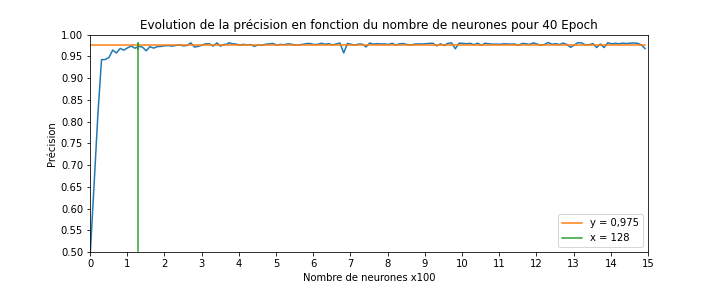

En calculant l'évolution de la précision en fonction du nombre de neurones, nous constatons que passé une centaine de neurone, la précision converge vers **97.5%**. Nous avons donc choisi d'implémenter un réseau de **128 neurones**.

### 2. Proportions des résultats identifiés

Il est temps de présenter plus en détail les résultats des modèles précédents. Comme expliquer précédemment, présenter simplement la précision globale des procédés décrits précédemment n'est pas des plus pertinents. Nous allons par conséquent collecter les performances par résultat afin de déterminer quel résultat est le plus à même de ne pas être identifié, et par quelle méthode.

Après mise en forme des résultats, on obtient le graphique suivant :

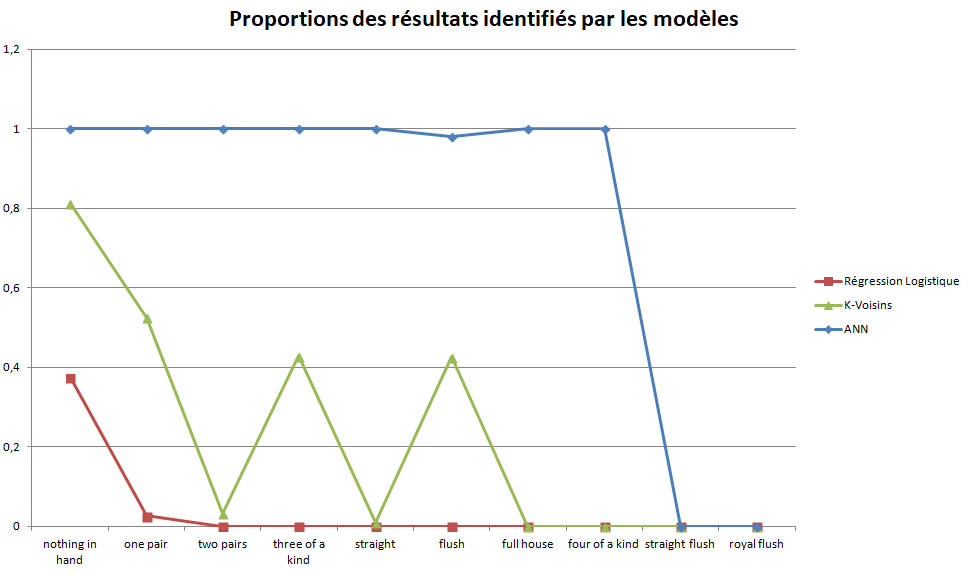

Tout d'abord, on est directement en mesure de classer les modèles selon leurs performances. Le réseau de neurones présente de très loin les meilleures prédictions pour chaque issue possible.

En général, **rien dans la main** est l'issue la mieux identifiée par les modèles. Cela peut s'expliquer par le fait qu'il s'agisse de la main la plus récurrente au poker. Le jeu ayant une répartition réaliste comme vu lors de l'analyse des données, les modèles se sont principalement entrainés à reconnaitre cette issue.

D'autre part, l'ANN identifie quasiment toutes les issues. Seules deux lui résistent, comme aux autres modèles. On peut en revanche expliquer cela du fait de la faible représentation de ces jeux sur le training test. Il y a en effet seulement **3 quintes flush royale pour 1 000 000 de mains** et encore, ce résultat est réalistiquement considéré, déjà gonflé.

Il faudrait entrainer davantage l'ANN à reconnaitre une **quinte flush** et une **quinte flush royale** pour parfaire ses performances déjà prometteuses.

## Sources
- Introduction to Machine Learning
Supervised Learning: Generalities & Linear Models, Sébastien Harispe, 30 janvier 2022

- Artificial Neural Networks and Deep Learning, A practical introduction, Sébastien Harispe, Semptember 7, 2021


- PREDICTING POKER HANDS WITH NEURAL NETWORKS, An example of a multivariate data type classification problem using Neuroph [neuroph.sourceforge.net](http://neuroph.sourceforge.net/tutorials/PredictingPokerhands/Predicting%20poker%20hands%20with%20neural%20networks.htm)

- Nous avons utilisé le jeu "Poker Hand Dataset" téléchargé sur le site de l'[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).